In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [351]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 29.4MB/s]


In [352]:
df = pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [353]:
df.shape

(500, 9)

###Column Profiling:

Serial No. (Unique row ID)

GRE Scores (out of 340)

TOEFL Scores (out of 120)

University Rating (out of 5)

Statement of Purpose and Letter of Recommendation Strength (out of 5)

Undergraduate GPA (out of 10)

Research Experience (either 0 or 1)

Chance of Admit (ranging from 0 to 1)

In [354]:
# to check the number of null values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [355]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [356]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [357]:
####Droping the unique row Identifier

df=df.drop('Serial No.',axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


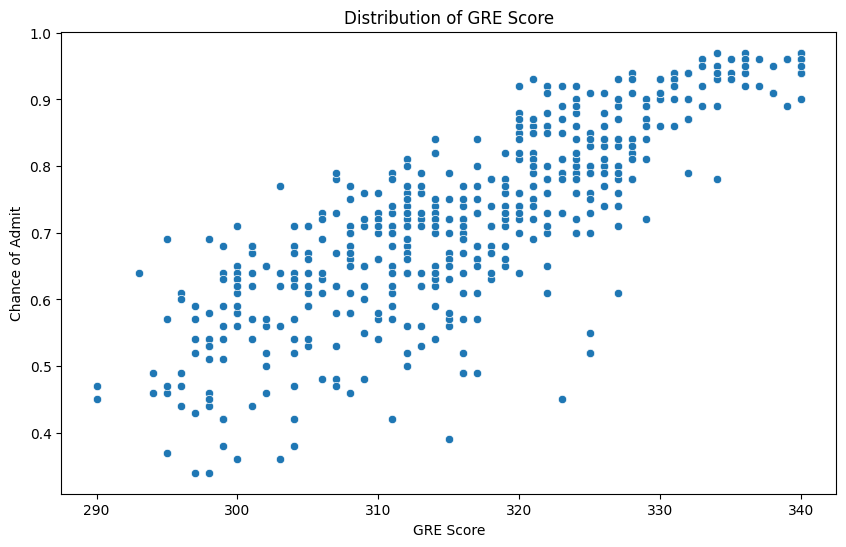

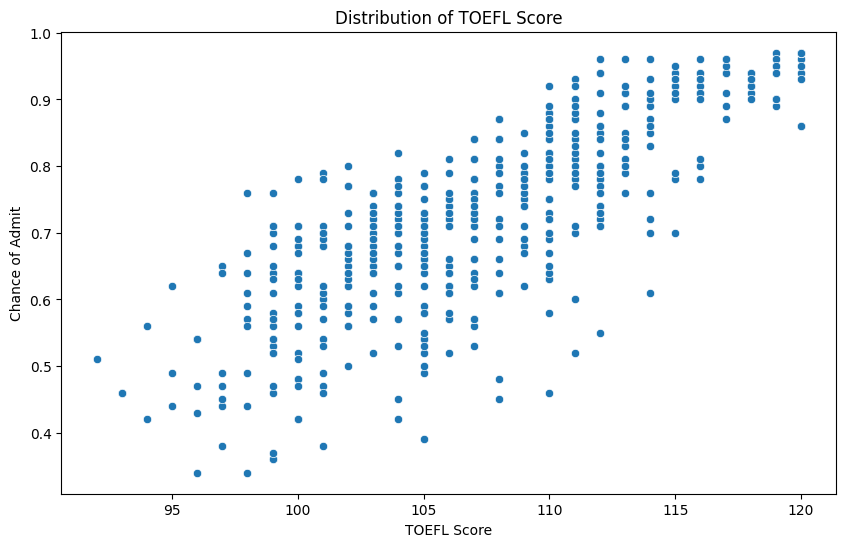

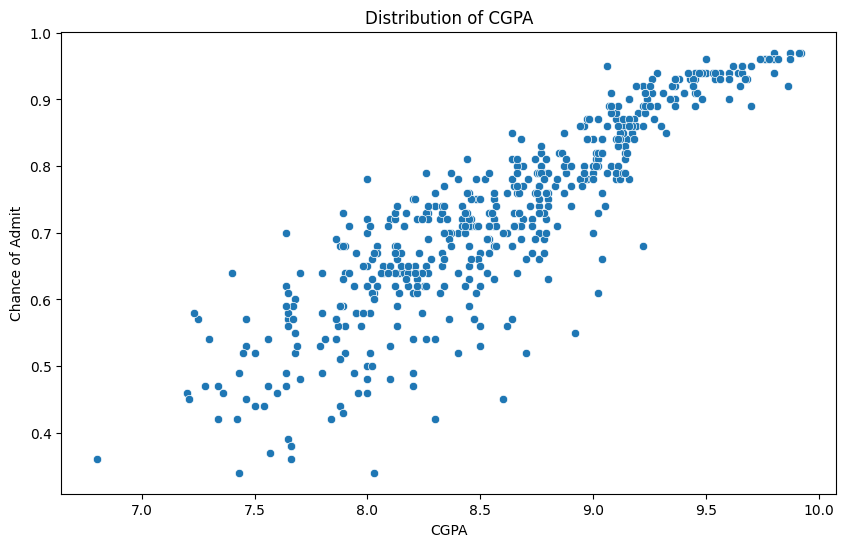

In [358]:
###EDA

### Chance of Admit is a target variable so lets do EDA around this variable

# bivariate Analysis - Continuous Variables
continuous_vars = ['GRE Score', 'TOEFL Score', 'CGPA']
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[var],y=df['Chance of Admit '])
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Chance of Admit')
    plt.show()

### Higher the GRE score,Higher the CGPA, higher the TOEFL score the chance of Admit is higher and there are few outliers where the GRE score is high but Admit chance is low.



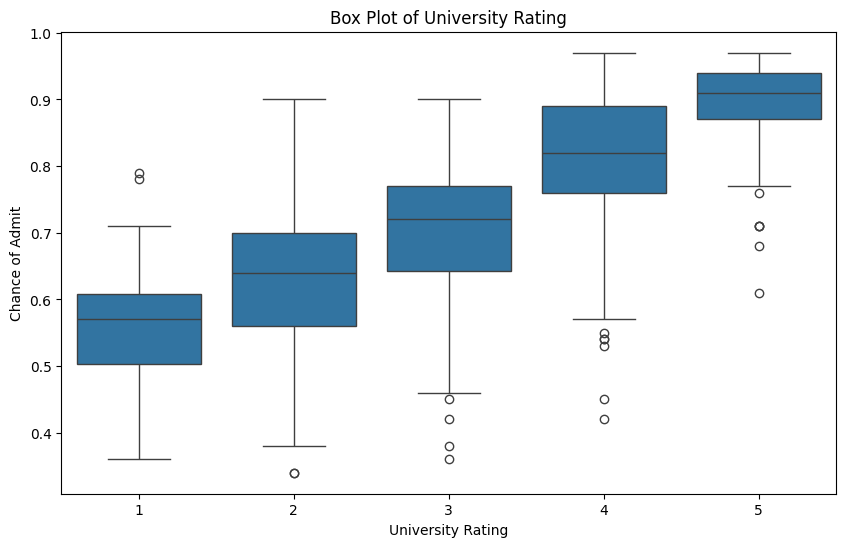

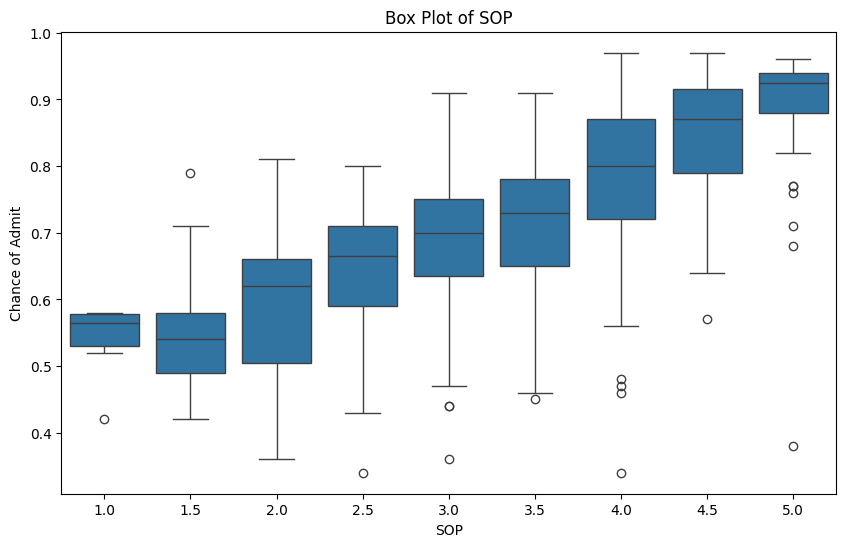

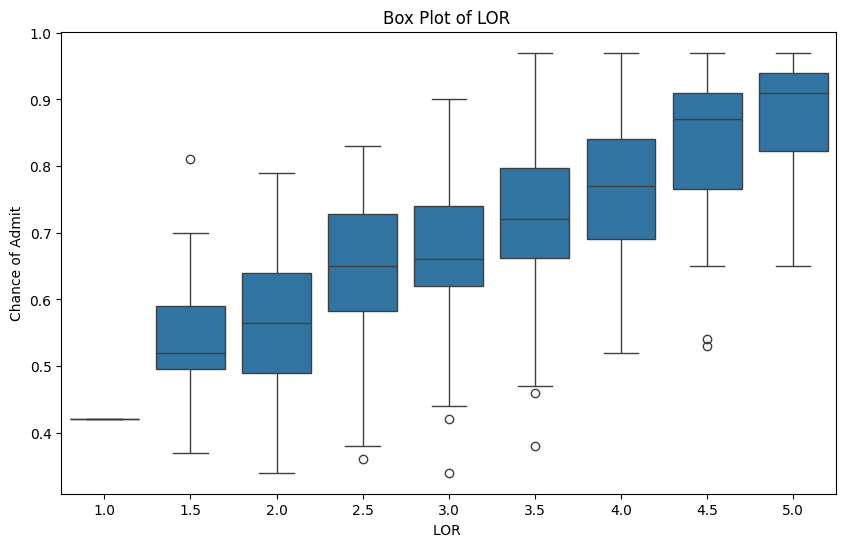

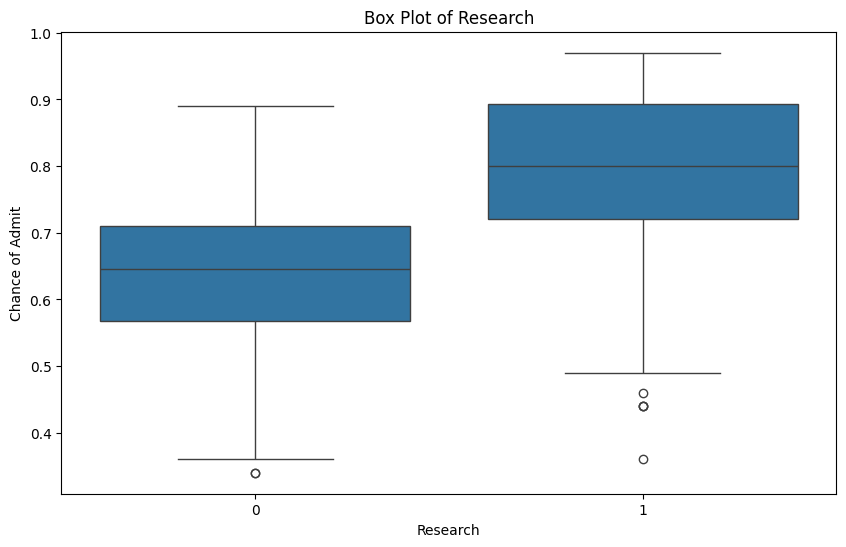

In [359]:
# bivariate Analysis - Categorical Variables
categorical_vars = ['University Rating', 'SOP', 'LOR ', 'Research']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[var],y=df['Chance of Admit '])
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Chance of Admit')
    plt.show()

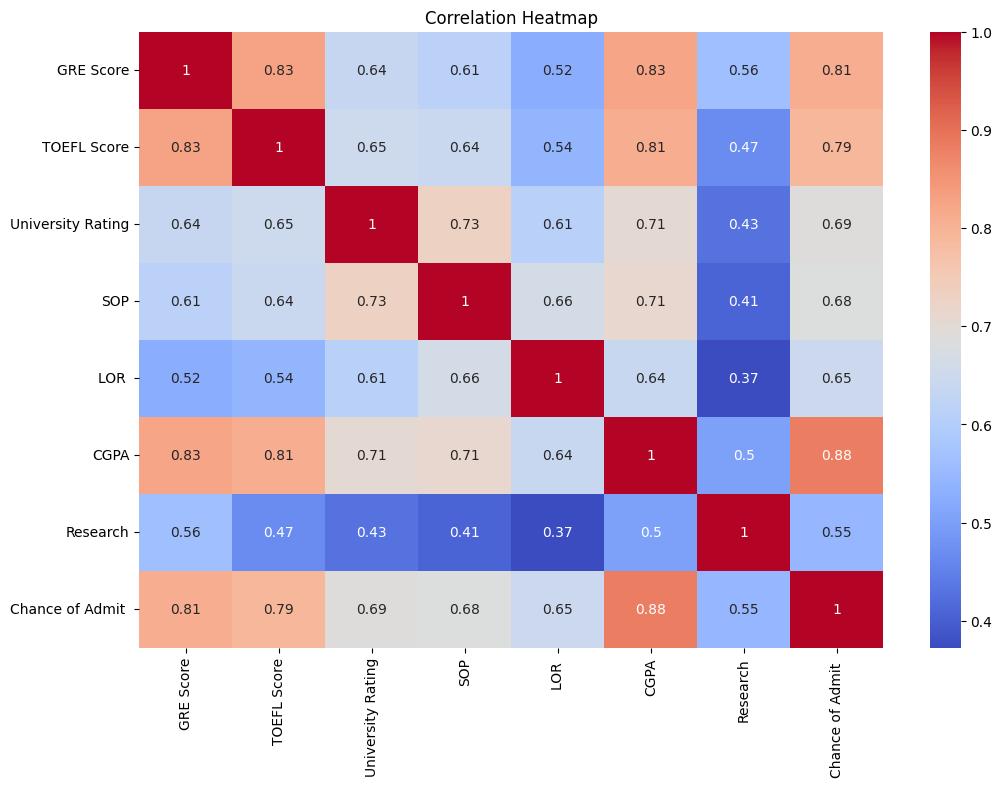

In [360]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### GRE Score, TOEFL Score and CGPA are highly correalated with the chance of Admit.
#### Based on the bivariate analysis we can also see that higher the GRE,TOEFL,CGPA there is a higher chance in Admit.
#### Also GRE score, TOEFL SCore and CGPA are also correlated with each other.

In [361]:
### Data Preprocessing

# Check for duplicate values

duplicate_values = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_values}')

# Check for missing values

missing_values = df.isnull().sum()
print('Missing values in each column:\n', missing_values)

Number of duplicate rows: 0
Missing values in each column:
 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [362]:
# Identifying and treating outliers using IQR

for var in continuous_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_without_outliers = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]

df_without_outliers.shape

(500, 8)

#### Number of duplicate rows: 0
#### Missing values in each column:0
#### The outliers is also none


In [363]:
### Scaling the data as GRE, TOEFL, CGPA are of different range

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


In [364]:
### Preparing the data for Linear Regression

X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

### Spliting the data into train , Validation and Test

from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Spliting the train_val into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [365]:
print(X.shape, y.shape)

(500, 7) (500,)


In [366]:
###  MultiVariate Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [367]:
model.coef_

array([0.16573658, 0.15748069, 0.00924157, 0.0219303 , 0.12033653,
       0.5307656 , 0.05239047])

In [368]:
model.intercept_

0.00738199464749123

In [369]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

             Feature  Coefficient
0          GRE Score     0.165737
1        TOEFL Score     0.157481
2  University Rating     0.009242
3                SOP     0.021930
4               LOR      0.120337
5               CGPA     0.530766
6           Research     0.052390


In [370]:
model.score(X_train, y_train)

0.809467797683702

In [371]:
model.score(X_val, y_val)

0.8533599488294801

In [372]:
class MyLinearRegression() :
    def __init__(self, learning_rate=0.01, iterations=20):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def predict(self, X):
        return np.dot(X, self.W) + self.w0


    def update_weights(self):
        Y_pred = self.predict( self.X )

        # calculate gradients
        B = self.X
        A = Y_pred - self.Y
        dW =  2* B.T.dot(A)/self.n

        dw0 =  2*np.sum(A)/self.n

        # update weights
        self.W = self.W - self.learning_rate * dW
        self.w0 = self.w0 - self.learning_rate * dw0

        return self


    def fit(self, X, Y):
        # no_of_training_examples, no_of_features

        self.n, self.d = X.shape

        # weight initialization
        self.W = np.zeros((self.d, 1))
        self.w0 = 0
        self.X = X
        self.Y = Y
        self.error_list=[]

        # gradient descent learning
        for i in range(self.iterations):
            self.update_weights()

            Y_pred = self.predict(X)

            error = np.mean((Y-Y_pred)**2) # MSE

            self.error_list.append(error)

        return self


    def score(self, X, y):
        y_ = self.predict(X)

        ss_res = np.sum((y-y_)**2)
        ss_tot = np.sum((y- y.mean())**2)

        score = 1 - (ss_res/ss_tot)
        return score

In [373]:
X_train.shape

(300, 7)

In [374]:
y_train.shape

(300,)

In [375]:
y_train = y_train.values.reshape(len(y_train), 1)
y_train.shape

(300, 1)

In [376]:
my_model = MyLinearRegression()
my_model.fit(X_train, y_train)

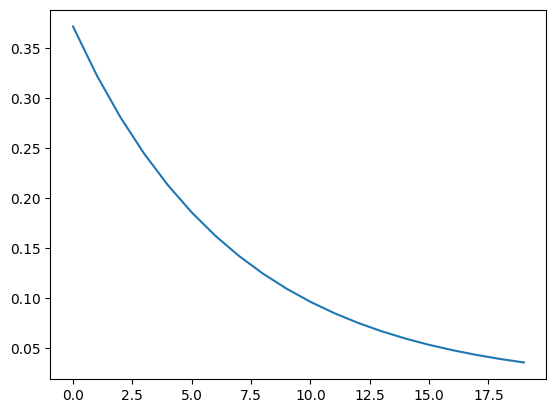

In [377]:
plt.plot(my_model.error_list);

In [378]:
my_model = MyLinearRegression(learning_rate=0.2, iterations=100)
my_model.fit(X_train, y_train)

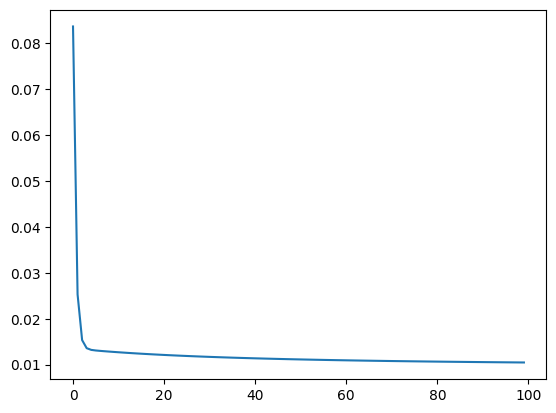

In [379]:
plt.plot(my_model.error_list);

In [380]:
my_model.W

,0
GRE Score,0.195280
TOEFL Score,0.191164
University Rating,0.068609
SOP,0.085341
LOR,0.126676
CGPA,0.245347
Research,0.065387


In [381]:
my_model.w0

0.05696233030345437

In [382]:
# train performance
my_model.score(X_train, y_train)

0.7935764940084249

In [383]:
X_val.shape

(100, 7)

In [384]:
y_val.shape

(100,)

In [385]:
y_val = y_val.values.reshape(len(y_val), 1)
y_val.shape

(100, 1)

In [386]:
# validation dataset performance
my_model.score(X_val, y_val)

0.815654908740411

In [387]:
y_pred = model.predict(X_val)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
n = X_val.shape[0]
p = X_val.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f'RMSE: {rmse}, R2: {r2}, Adjusted R2: {adj_r2}')

RMSE: 0.08229671560213156, R2: 0.8533599488294801, Adjusted R2: 0.8422025536317231


In [388]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression

ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_val)

ridge_r2 = r2_score(y_val, ridge_pred)

print(f'Ridge R2: {ridge_r2}')



Ridge R2: 0.8431901458341512


In [389]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)

lasso_model.fit(X_train, y_train)

lasso_pred = lasso_model.predict(X_val)

lasso_r2 = r2_score(y_val, lasso_pred)

print(f'Lasso R2: {lasso_r2}')

Lasso R2: -0.006014300123668326


###Testing the Assumptions of the Linear Regression Model

In [390]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

### Spliting the data into train , Validation and Test

from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Spliting the train_val into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     177.2
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          3.55e-101
Time:                        05:14:53   Log-Likelihood:                 270.15
No. Observations:                 300   AIC:                            -524.3
Df Residuals:                     292   BIC:                            -494.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6140      0.006    106.699      0.0

In [391]:
# VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [392]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,5.13
5,CGPA,4.77
1,TOEFL Score,4.10
2,University Rating,2.65
3,SOP,2.64
4,LOR,1.85
6,Research,1.60


In [393]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     200.7
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          1.17e-100
Time:                        05:14:53   Log-Likelihood:                 266.14
No. Observations:                 300   AIC:                            -518.3
Df Residuals:                     293   BIC:                            -492.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6140      0.00

In [394]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['GRE SCORE ']
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()
  if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])
  i += 1

Reached threshold
Highest vif: Features    CGPA
VIF         4.07
Name: 0, dtype: object
Current adj.R2 0.7366989156715634
Features removed: 1
List of features removed: ['GRE SCORE ']


In [395]:
print(vif)
print(sm_model.summary())

            Features   VIF
0               CGPA  4.07
1        TOEFL Score  3.13
3                SOP  2.64
2  University Rating  2.62
4               LOR   1.84
5           Research  1.44
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     168.3
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           4.67e-84
Time:                        05:14:53   Log-Likelihood:                 224.16
No. Observations:                 300   AIC:                            -436.3
Df Residuals:                     294   BIC:                            -414.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     

###Errors are normally distributed

In [396]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

In [397]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

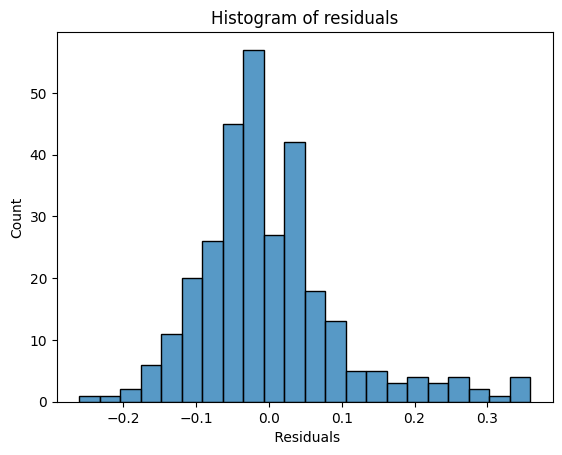

In [398]:
import seaborn as sns
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [399]:
### Shapiro Wilk test

from scipy import stats
res = stats.shapiro(errors)
res.statistic

0.9279422760009766

### Closer the value to 1, more is the normality. In this case, a value of 0.927 denotes a high level of normality for the error distribuiton

###Heteroskedasticity should not exist

In [400]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

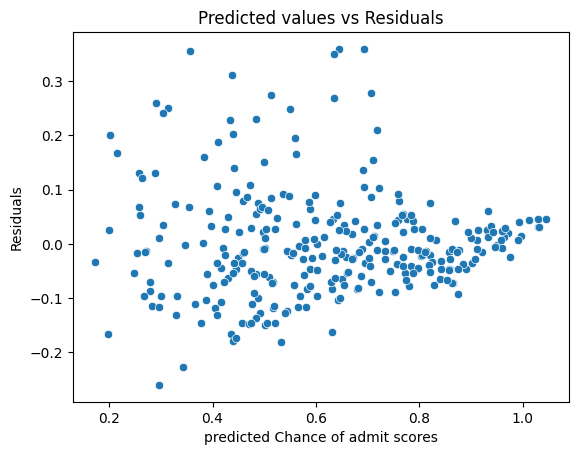

In [401]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Chance of admit scores")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

In [402]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X2_sm)
lzip(name, test)

[('F statistic', 0.764344447558089), ('p-value', 0.9459964779136106)]

From the goldfeld-quandt test:

F Statistic comes out to be 0.76 => Implying minimal difference in variance between groups
p-value of 0.945 indicates that this difference is statistically significant at conventional levels of significance (e.g., 0.05).
Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.

###Summing up the Assumptions:
#### There exist a linear function
#### Errors are normally distributed
#### No heteroskedasticity
#### No multicollinearity

In [403]:
X_test.shape

(100, 7)

In [404]:
y_test.shape

(100,)

In [405]:
y_test = y_test.values.reshape(len(y_test), 1)
y_test.shape

(100, 1)

In [406]:
# Testing the final model on the test set

my_model.score(X_test,y_test)

0.8031317810592429

In [407]:
y_pred = model.predict(X_test)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f'RMSE: {rmse}, R2: {r2}, Adjusted R2: {adj_r2}')

RMSE: 0.09659934371674554, R2: 0.8188926239773981, Adjusted R2: 0.8051127149322002


### Actionable Insights & Recommendations

1. High GRE scores generally correlate with higher chances of admission, indicating the importance of standardized test performance in the admissions process.

2. TOEFL scores are also significant, especially for international students. High TOEFL scores reflect good English proficiency, which is crucial for academic success.

3. A strong undergraduate GPA is a significant predictor, reflecting past academic performance as an indicator of future success.
Research Experience:

4. Having research experience positively influences the chances of admission, highlighting the value of practical, hands-on experience in the field.

Given the performance scores of the MyLinearRegression model:


Train data performance score on MyLinearRegression Model      : **0.7935**

Validation data performance score on MyLinearRegression model : **0.8156**

Test data performance score on MyLinearRegression Model       : **0.8031**

These scores indicate that the model performs well across different datasets, suggesting good generalizability. The slight improvement in validation score compared to the training score suggests that the model is not overfitting and has been well-regularized.

### Potential Business Benefits from Improving the Model

1. By accurately identifying top candidates, the model can improve the quality of the students selection, leading to better academic performance and higher graduation rates.

2. The model can provide valuable insights into trends and patterns in the applicant pool, helping to refine admissions strategies and marketing efforts.